# Ford GoBike System Data
## by (Tasnime Aboelyazid)

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area. I am invistigeting the app data for 2019.
> this dataset consist of approximately 183412 trip

In [113]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [114]:
df = pd.read_csv('fordgobike.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [115]:
df.shape

(183412, 16)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [117]:
df.isnull().sum() # checking for null values

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [118]:
df.duplicated().sum() # no duplicated rows

0

### Cleaning

In [119]:
# change the data type for start and end time to be datetime64[ns] 
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [120]:
# add new columns for trip duration in minute, trip start date in yyyy-mm-dd format,
# trip start hour of the day, day of week 
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hour'] = df.start_time.dt.strftime('%H')
df['start_day'] = df.start_time.dt.strftime('%A')

In [121]:
# add a new column calculating riders' age 
df['member_age'] = 2019 - df['member_birth_year']

In [122]:
# null values not very big in reference to dataset
# copying the dataset while droping null values 
data = df.dropna()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [78]:
data.member_gender.value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [84]:
data.start_station_name.value_counts()

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [123]:
# exploring the age of member
data.member_age.value_counts()

31.0     10214
26.0      9323
30.0      8967
29.0      8640
28.0      8484
         ...  
89.0         1
92.0         1
91.0         1
109.0        1
141.0        1
Name: member_age, Length: 75, dtype: int64

> discovering some members above 80 which doesn't make sense , so eliminating those values

In [124]:
# filter out outlier ages from visually examination of the distribution above
data = data.query('member_age <= 80')
# transforming the type of member age to integer
data['member_age'] = data['member_age'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174760 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174760 non-null  int64         
 1   start_time               174760 non-null  datetime64[ns]
 2   end_time                 174760 non-null  datetime64[ns]
 3   start_station_id         174760 non-null  float64       
 4   start_station_name       174760 non-null  object        
 5   start_station_latitude   174760 non-null  float64       
 6   start_station_longitude  174760 non-null  float64       
 7   end_station_id           174760 non-null  float64       
 8   end_station_name         174760 non-null  object        
 9   end_station_latitude     174760 non-null  float64       
 10  end_station_longitude    174760 non-null  float64       
 11  bike_id                  174760 non-null  int64         
 12  user_type       

### What is the structure of your dataset?

> The original dataset comtained 183,412 data trips with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip)
> there is some variations made to make it more appropriate for analysis :
 >  1) trip : start_date , start_hour , start_day 
  > 2) member: age




### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out how trip duration is dependent on other features such as: age, start station, end station, user type, and gender from the dataset.Sample questions to answer: When are most trips taken in terms of time of day, day of the week, or month of the year? How long does the average trip take? Does the above depend on if a user is a subscriber or customer?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that Morning and afternoon will have more trips than night time due to rush hours. Also, I assume younger riders are more than older riders because of physical abilities. and also males rider are more than females 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [70]:
plt.rcParams['figure.figsize'] = 8, 6

### plots for discussing the peaks of days and hours 

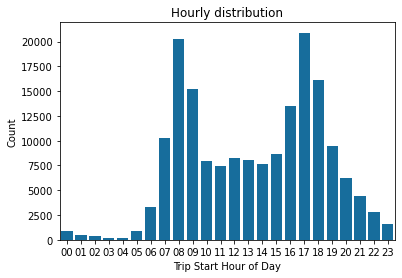

In [125]:
# trip distribution over day hours
base_color = sb.color_palette('colorblind')[0]
# ordering the time
hour = ['00','01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
sb.countplot(data=data, x='start_hour', color=base_color, order = hour);
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');
plt.title('Hourly distribution');

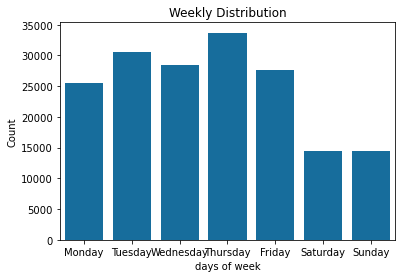

In [126]:
# trip distribution over weekdays
# ordering the weekdays
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
data['start_day'] = data['start_day'].astype(weekdaycat)
sb.countplot(data=data, x='start_day', color=base_color);
plt.xlabel('days of week');
plt.ylabel('Count');
plt.title('Weekly Distribution');

> The trip distribution over day hours peaks around two timeframes, 8am-9am and 17pm-18pm, during typical rush hours. 
> also while observing the trip distribution over days, we see thatthe majority of rides happened on work days (Mon-Fri) 

### plots for discussing the most important user 

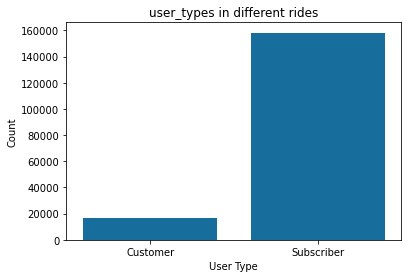

In [127]:
# getting to know which type of users are making more rides
sb.countplot(data=data, x='user_type', color=base_color);
plt.xlabel('User Type');
plt.ylabel('Count');
plt.title('user_types in different rides');

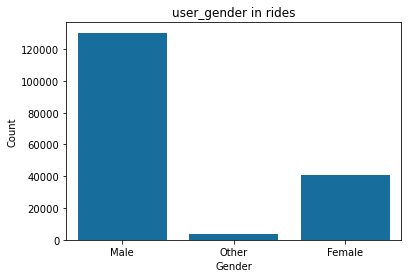

In [28]:
sb.countplot(data=data, x='member_gender', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Count');
plt.title('user_gender in rides');

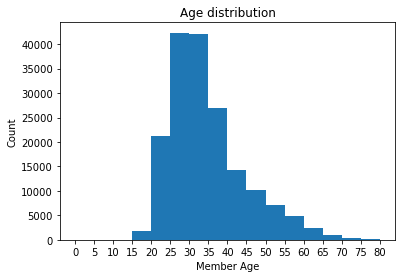

In [128]:
# seeing age vs numbers of rides
bins = np.arange(0, data['member_age'].max()+5, 5)
plt.hist(data=data, x='member_age', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Member Age');
plt.ylabel('Count');
plt.title('Age distribution');

> most riders were male subscribers.and most members were around 20 to 40 years old, most trips were on Mon-Fri and the peak is during rush hours of a day. As the age gets older, bike usage dropped significantly.
> all this shows that the users are workers 

### plots for getting information about duration of various rides

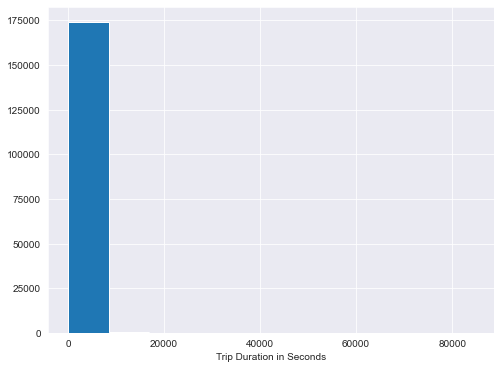

In [136]:
# duration of trips in sec vs number of rides
plt.hist(data=data, x='duration_sec');
plt.xlabel('Trip Duration in Seconds');

> add a new column duration in minutes to get better understanding of data

In [103]:
data['duration_minute'] = data['duration_sec']/60

<ipython-input-103-39ce47617c94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration_minute'] = data['duration_sec']/60


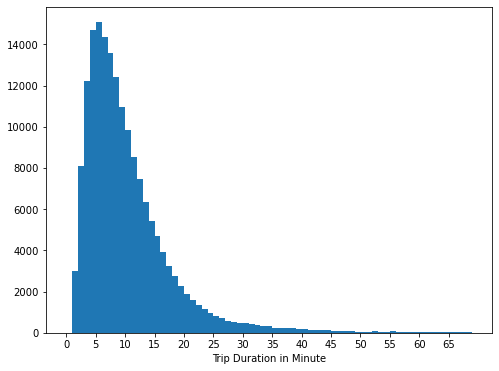

In [104]:
bins = np.arange(0, 70, 1)
ticks = np.arange(0, 70, 5)
plt.hist(data=data, x='duration_minute', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

> It looks like the majority of the trips were between 5 to 15 minutes range. 


### plots to discuss the influence of start and end station on number of rides

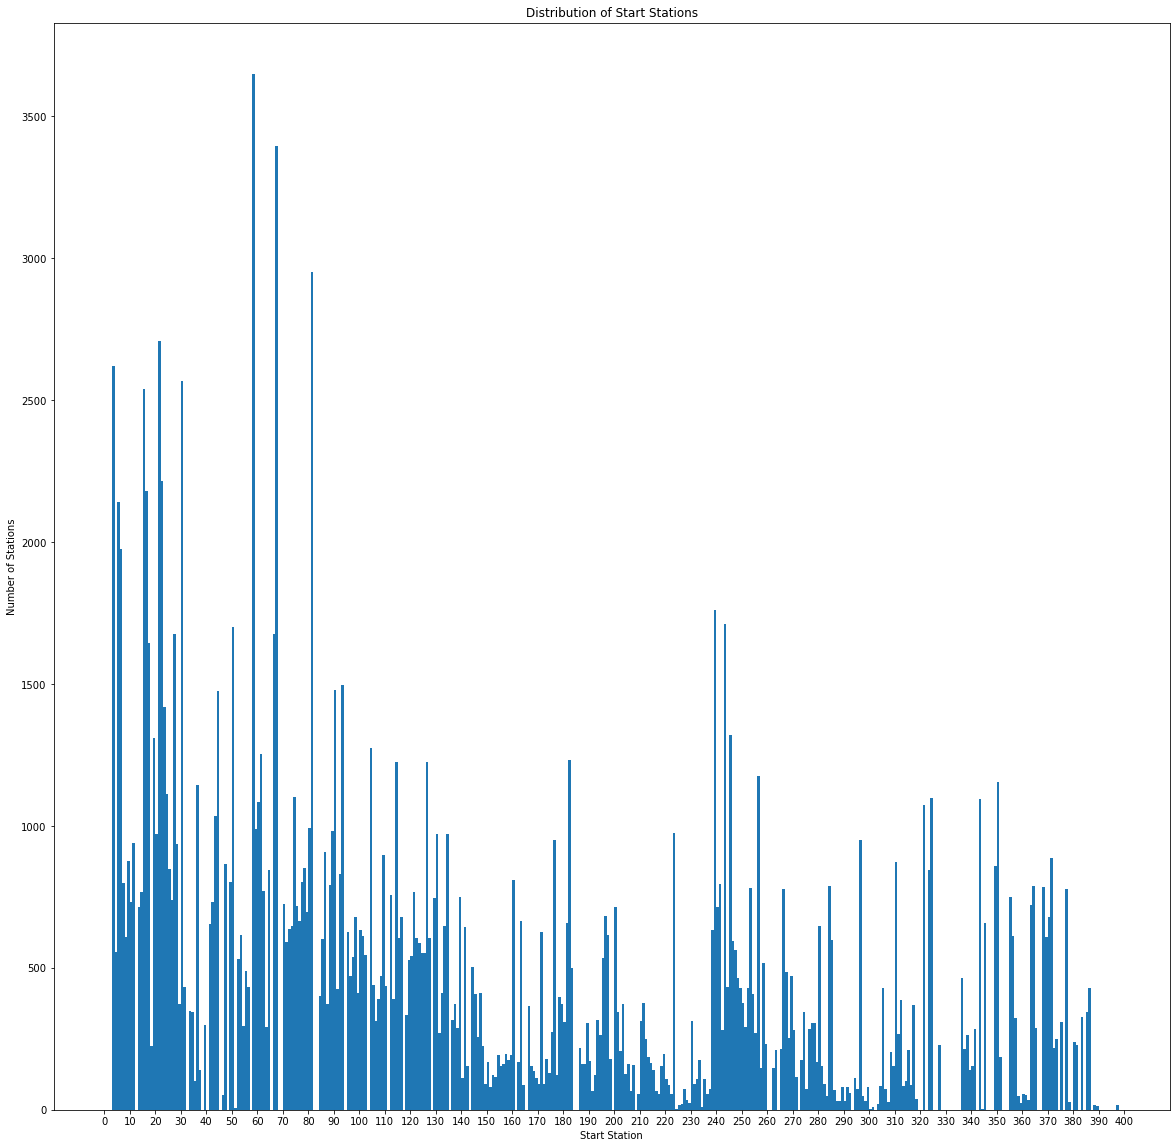

In [53]:
# Plotting start station id distribution on a standard scale
bins = np.arange(0, df['start_station_id'].astype(float).max()+1, 1)
plt.figure(figsize=[20, 20])
plt.xticks(range(0, 402, 10))
plt.hist(data = data, x = 'start_station_id', bins = bins)
plt.title('Distribution of Start Stations')
plt.xlabel('Start Station')
plt.ylabel('Number of Stations')
plt.show()

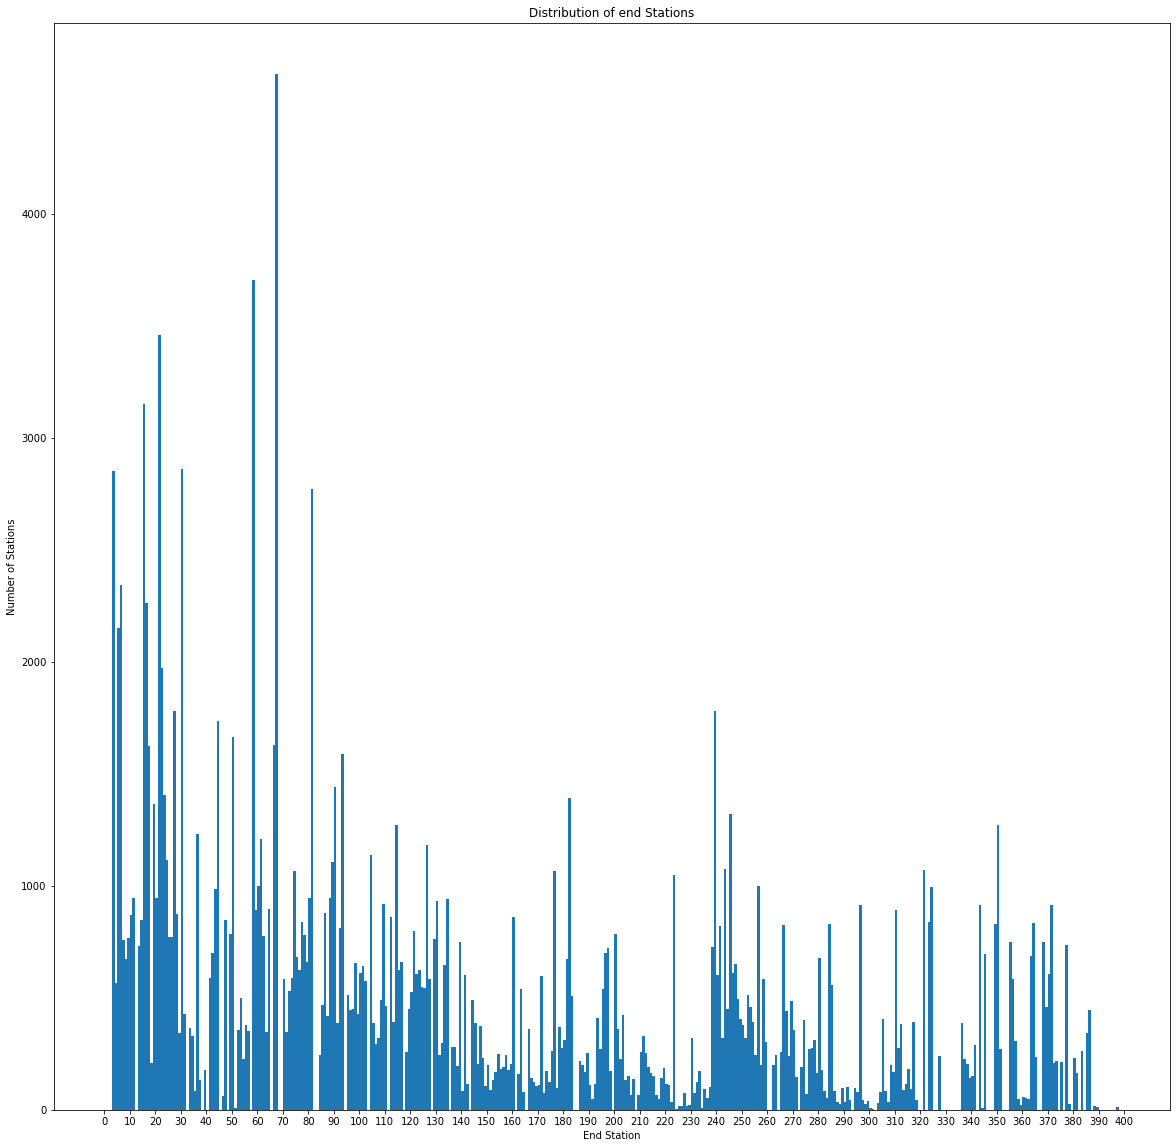

In [54]:
# Plotting end station id distribution on a standard scale
bins = np.arange(0, df['end_station_id'].astype(float).max()+1, 1)
plt.figure(figsize=[20, 20])
plt.xticks(range(0, 402, 10))
plt.hist(data = data, x = 'end_station_id', bins = bins)
plt.title('Distribution of end Stations')
plt.xlabel('End Station')
plt.ylabel('Number of Stations')
plt.show()

> the both of them are the same , there is some station that are popular and has more rides 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The number of trips peaked around 8-9am and 17-18pm during a day, there were more trips on work days (Mon-Fri) compared to weekends.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> While investigating ,user-wise, there were more male riders than female, and most members were subscribers compared to casual riders, and most riders were around 25 to 40 years old.

>Most rides were quick and short, lasted between 5 to 15 minutes,

## Bivariate Exploration

### How does the trip duration distribution vary between different riders upon their age

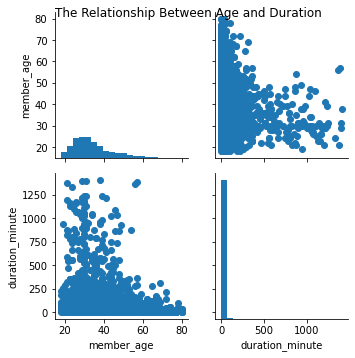

In [60]:
numeric_vars = ["member_age", "duration_minute"]
g = sb.PairGrid(data = data, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter)
g.fig.suptitle('The Relationship Between Age and Duration');

> younger riders are more often using the app and making more rides then the  older riders , but most of the rides are short 

### How does the trip duration distribution vary by gender?

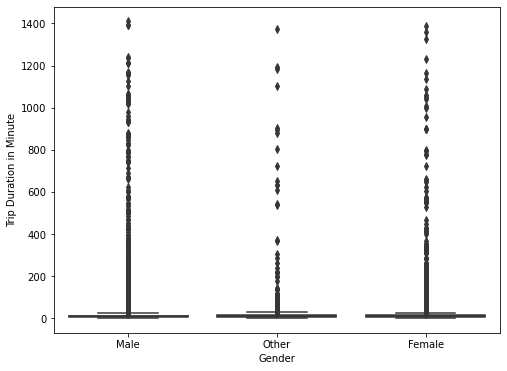

In [81]:
sb.boxplot(data=data, x='member_gender', y='duration_minute', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute');


> values are very widespread to see (outliers) , so trim the plot from y axis to get better view

(-1.0, 50.0)

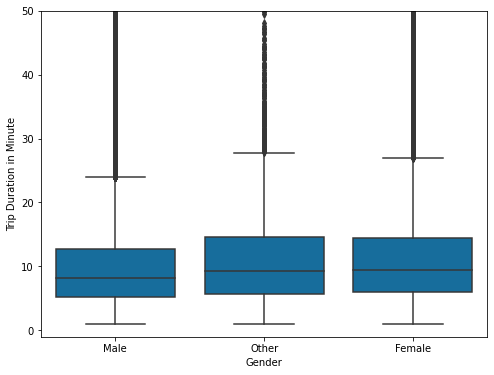

In [85]:
sb.boxplot(data=data, x='member_gender', y='duration_minute', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute');
plt.ylim([-1, 50])

> number male riders tend to have shorter trips compared to female users , anf female and other riders take longer trips

### Average Trip Duration on Weekdays ?

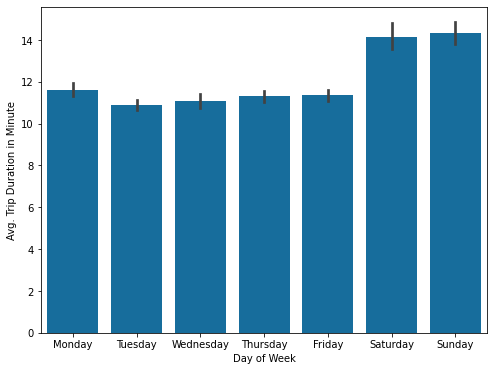

In [105]:
sb.barplot(data=data, x='start_day', y='duration_minute', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');


> The riding trips are much shorter on Monday through Friday compared to weekends. It indicates a pretty stable and efficient usage of the sharing system on normal work days, while more casual flexible use on weekends.

### user type vs duration

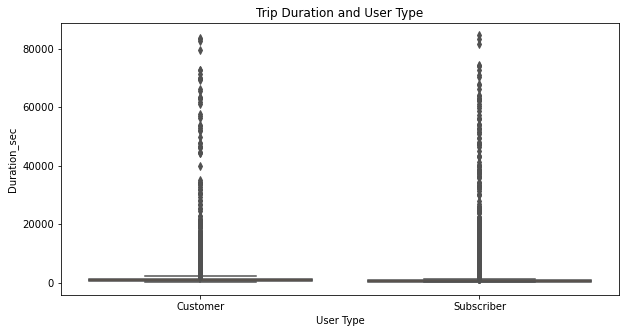

In [88]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = data, x = 'user_type', y = 'duration_sec', color = base_color)
plt.title('Trip Duration and User Type')
plt.xlabel('User Type')
plt.ylabel('Duration_sec')
plt.show()

> values are very widespread to see (outliers) , so trim the plot from y axis to get better view

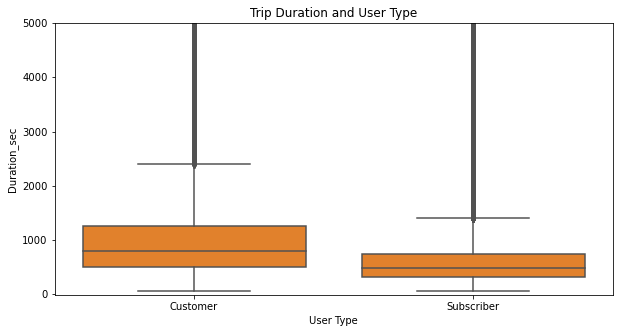

In [92]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 5000])
plt.title('Trip Duration and User Type')
plt.xlabel('User Type')
plt.ylabel('Duration_sec')
plt.show()

> Riders who are customers take longer trips than subscribers 

### hourly usage between customers and subscribers

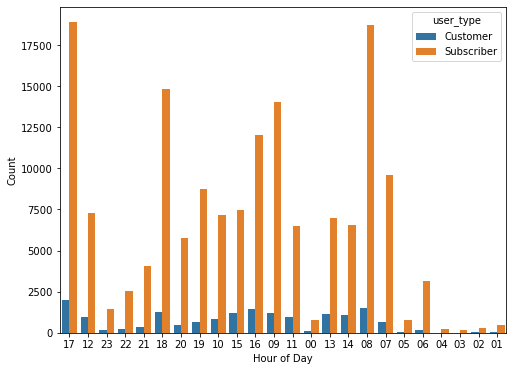

In [106]:
sb.countplot(data=data, x='start_hour', hue='user_type');
plt.xlabel('Hour of Day');
plt.ylabel('Count');

> Subscriber usage clearly peaks out on typical rush hours when people go to work in the morning and getting off work in the afternoon, double confirmed their usage purpose and goal of riding. Similar pattern was not observed among customers who tend to ride most in the afternoon or early evening as for a different purpose than the subscriber riders.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Trip Duration is very dependendable on the age of the member, when the age between 20 to 45, the trip duration is higher than the older ages. but the most preferable rides are the short ones
>  most trips were on work days (Mon-Fri) and especially during rush hours (when going to work in the morning and getting off work in the afternoon), Subscriber users are slightly older than customer users who tend to take longer rides overall .
> trip duration tends to be longer on weekends , which means more relaxing rides not for work

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> we get that subscribers take much shorter/quicker rides. 
> For gender, value of male members is very high but it got lower trip duration. 

## Multivariate Exploration

### How does the trip duration vary in weekdays between user types?

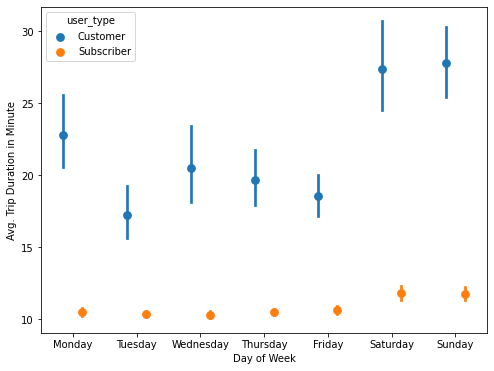

In [107]:
sb.pointplot(data=data, x='start_day', y='duration_minute', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

> It can be seen from the above plot that subscribers ride much shorter/quicker trips compared to customers on each day of the week. Both user types have an obvious increase of trip duration on Saturdays and Sundays over weekends, especially for casual riders. Subscribers usage seems to be more efficient than customers overall and maintained a very consistent average duration Monday through Friday.

### How does the hourly usage vary during weekdays for user types?



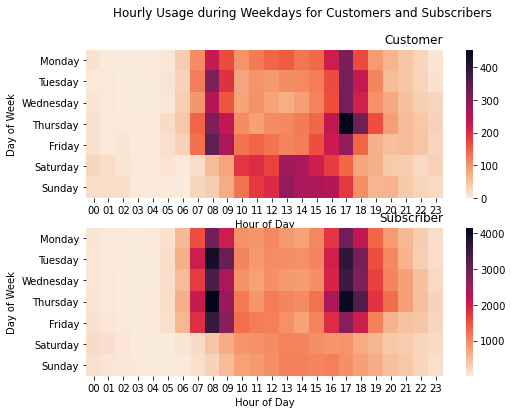

In [109]:

plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')
plt.subplot(2, 1, 1)
customers = data.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_day', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day', columns='start_hour', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = data.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_day', 'start_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day', columns='start_hour', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

> The heatmaps shows differences between the two type of riders. Subscribers use the system heavily on work days i.e. Monday through Friday whereas customers ride a lot on weekends. Many trips concentrated around 8-9am and 17-18pm on work days for subscribers when used for work commute, yet customers tend to use more in the late afternoon around 17pm Monday to Friday. 

### how does the trip duration vary between age and gender of riders ?

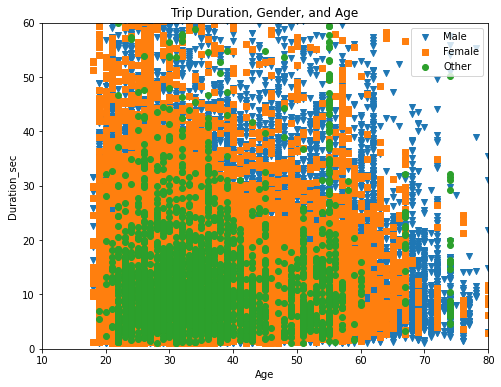

In [110]:
gender_mark = [['Male', 'v'],['Female', 's'],['Other', 'o']]
for gender, marker in gender_mark:
    df_gender = data[data['member_gender'] == gender]
    plt.scatter(( df_gender['member_age']), df_gender['duration_minute'], marker = marker, alpha= 1)
plt.legend(['Male','Female','Other'])
plt.axis([10, 80, 0, 60])
plt.title('Trip Duration, Gender, and Age')
plt.xlabel('Age')
plt.ylabel('Duration_sec')
plt.show()

C:\Users\SHIFT\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


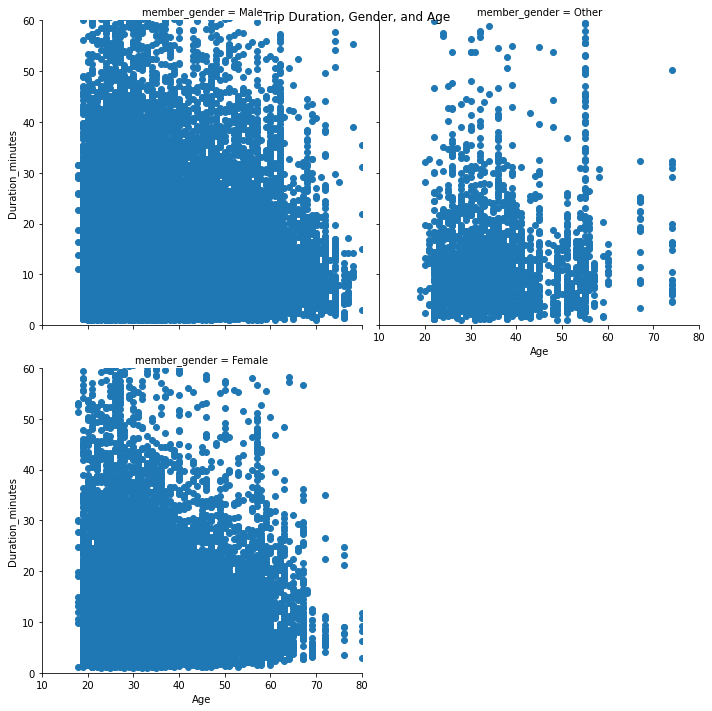

In [111]:
# get a clear plotting
gender = sb.FacetGrid(data = data, col = 'member_gender', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [0, 60])
gender.map(plt.scatter, 'member_age', 'duration_minute', alpha= 1)


gender.set_xlabels('Age')
gender.set_ylabels('Duration_minutes')
gender.fig.suptitle('Trip Duration, Gender, and Age')
plt.show()

> from previous plot we get that the male users are usimg more rides while comparing with female and other with long durations , other types of customers are taking long rides while they are older (50 - 60)

C:\Users\SHIFT\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


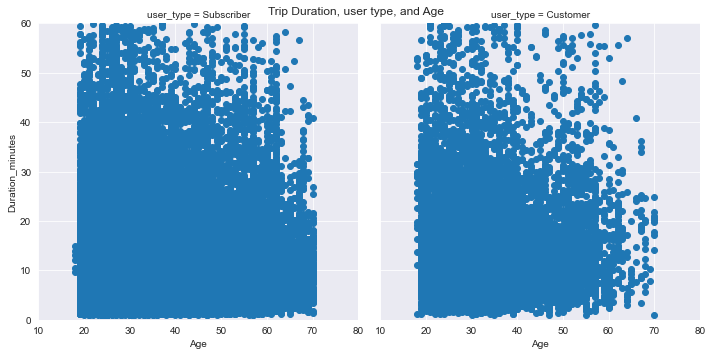

In [172]:
user_type = sb.FacetGrid(data = data, col = 'user_type', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [0, 60])
user_type.map(plt.scatter, 'member_age', 'duration_minute', alpha= 1)

user_type.set_xlabels('Age')
user_type.set_ylabels('Duration_minutes')
user_type.fig.suptitle('Trip Duration, user type, and Age')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploration confirmed the previous eplorations. The rides are mainly concentrated on rush hours Monday through Friday, indicating the use is primarily for work commute, The more relaxing and long rides are in weekends and that shows that the users are taking advantage of the bike sharing system quite differently.
> the number of users for male is higher but percentage is higher for women and other in trip duration
> It is surprising that for subscribers the trip duration is higher than customer for older age.

### Were there any interesting or surprising interactions between features?

> It'd be interesting to see how male and female use the system differently if there were more female data.
> Looking back on the plots, leaping for other gender at an older is a surprise. And, for subscribers the trip duration is higher than customer for older age is a surprise

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!